In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_abcd = pd.read_parquet("../data/ABCD_tripfiles.parquet", engine="pyarrow")
df_mnop = pd.read_parquet("../data/MNOP_tripfiles.parquet", engine="pyarrow")
df_zyxw = pd.read_parquet("../data/ZYXW_tripfiles.parquet", engine="pyarrow")

In [4]:
df_abcd.head()

,id,creation_time,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,header_line,entry_details
0,33902381,2024-05-01 09:14:42,AB,2359,1,BLR,service-acco,ASMMsgProcessor,"2024-05-01 09:14:42,420 INFO [3f326d134d9de45...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<ns2..."
1,33910427,2024-05-01 10:28:12,AB,2104,2,BLR,service-acco,ASMMsgProcessor,"2024-05-01 10:28:12,745 INFO [de24be75947007f...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<ns2..."
2,33910380,2024-05-01 10:28:11,AB,2109,2,BLR,service-acco,ASMMsgProcessor,"2024-05-01 10:28:11,301 INFO [df3a1cc7d574161...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<ns2..."
3,33909790,2024-05-01 10:28:12,AB,2110,2,BOM,service-acco,ASMMsgProcessor,"2024-05-01 10:28:12,189 INFO [9e66dfb1ffe9048...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<ns2..."
4,33902706,2024-05-01 09:14:41,AB,2127,2,BOM,service-acco,ASMMsgProcessor,"2024-05-01 09:14:41,884 INFO [829566f527b588f...","<?xml version=""1.0"" encoding=""UTF-8""?>\r\n<ns2..."


## **Specified Action DataFrame**

In [9]:
spec_df = pd.read_csv("actions/actions_data/abcd_EstimateStorePaxDataAction.csv")

In [10]:
spec_df.columns

Index(['Unnamed: 0', 'id', 'estimated_Y', 'estimated_Jump',
       'estimated_Standby', 'estimated_Male', 'estimated_Female',
       'estimated_Child', 'estimated_Infant', 'estimated_Bags',
       'estimated_BWgt', 'estimated_Average_BWgt'],
      dtype='object')

In [11]:
spec_df.head(-5)

,Unnamed: 0,id,estimated_Y,estimated_Jump,estimated_Standby,estimated_Male,estimated_Female,estimated_Child,estimated_Infant,estimated_Bags,estimated_BWgt,estimated_Average_BWgt
0,448458,33767667,189.0,NaN,0.0,121.0,59.0,9.0,4.0,135.0,1644.0,12.18
1,448461,33767820,162.0,NaN,0.0,83.0,68.0,11.0,2.0,0.0,0.0,NaN
2,448472,33767880,151.0,NaN,0.0,99.0,45.0,7.0,6.0,102.0,1149.0,11.26
3,448475,33767901,164.0,NaN,0.0,92.0,63.0,9.0,2.0,110.0,1650.0,15.00
4,448477,33767734,156.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5059,476084,34495574,185.0,NaN,0.0,93.0,71.0,21.0,5.0,162.0,1978.0,12.21
5060,476088,34495761,151.0,NaN,0.0,102.0,42.0,7.0,1.0,93.0,976.0,10.49
5061,476091,34495302,185.0,NaN,0.0,137.0,46.0,2.0,2.0,111.0,1155.0,10.41
5062,476094,34494366,179.0,NaN,0.0,112.0,60.0,7.0,2.0,115.0,1239.0,10.77


## **Action distribution**

In [71]:
def show_action(df, airline:str):

    grouped = df.groupby(["flight_number", "flight_date", "action_name"]).size().reset_index(name='counts')
    grouped = grouped.sort_values(by='action_name')

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='action_name', y='counts', data=grouped)
    plt.ylim(0, 800)
    
    plt.xlabel('Action Name')
    plt.ylabel('Count')
    plt.title(f'Action Counts Airline: {airline}')

    plt.xticks(rotation=90)

    plt.show()

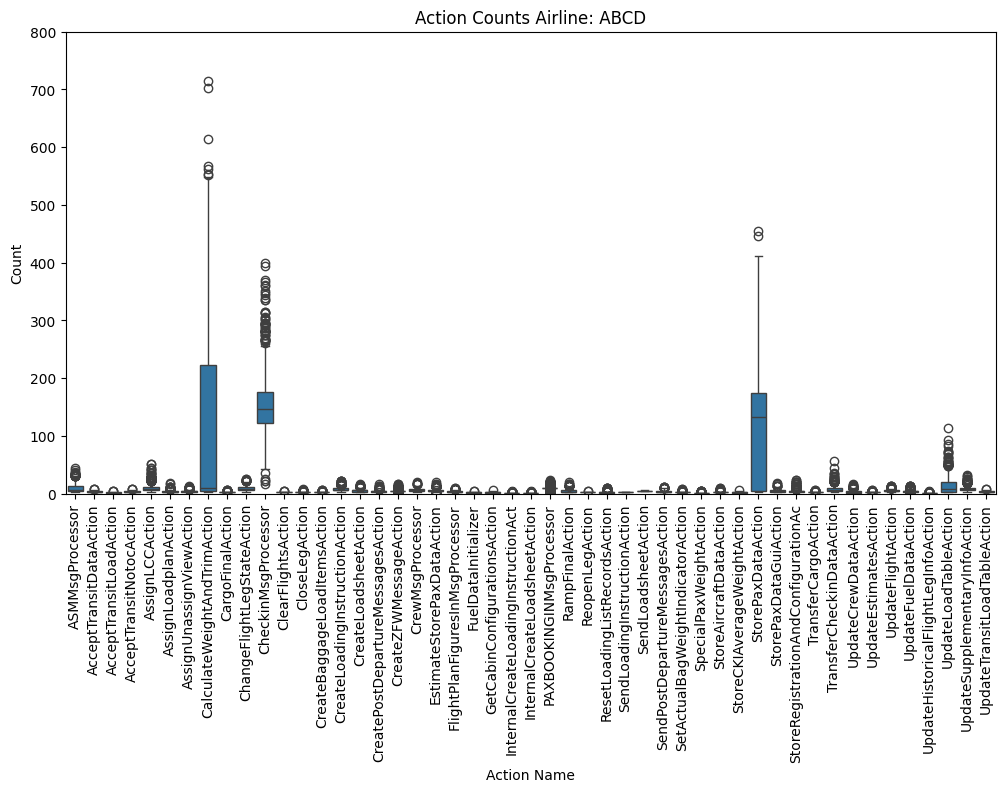

In [72]:
show_action(df_abcd, "ABCD")

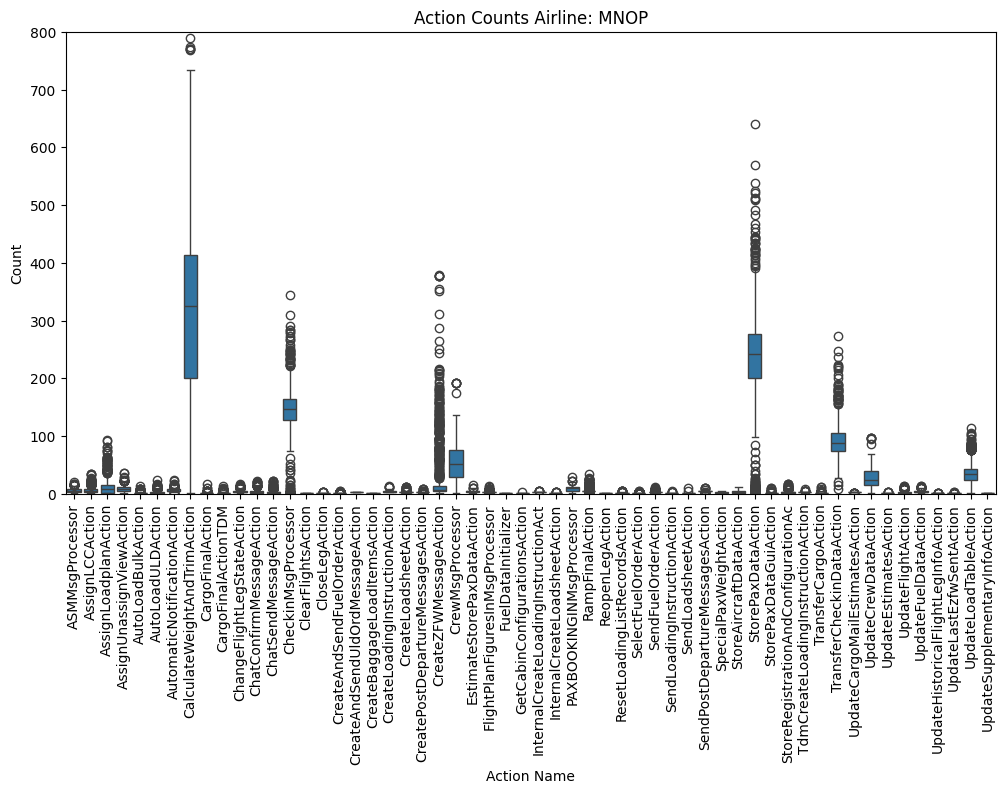

In [73]:
show_action(df_mnop, "MNOP")

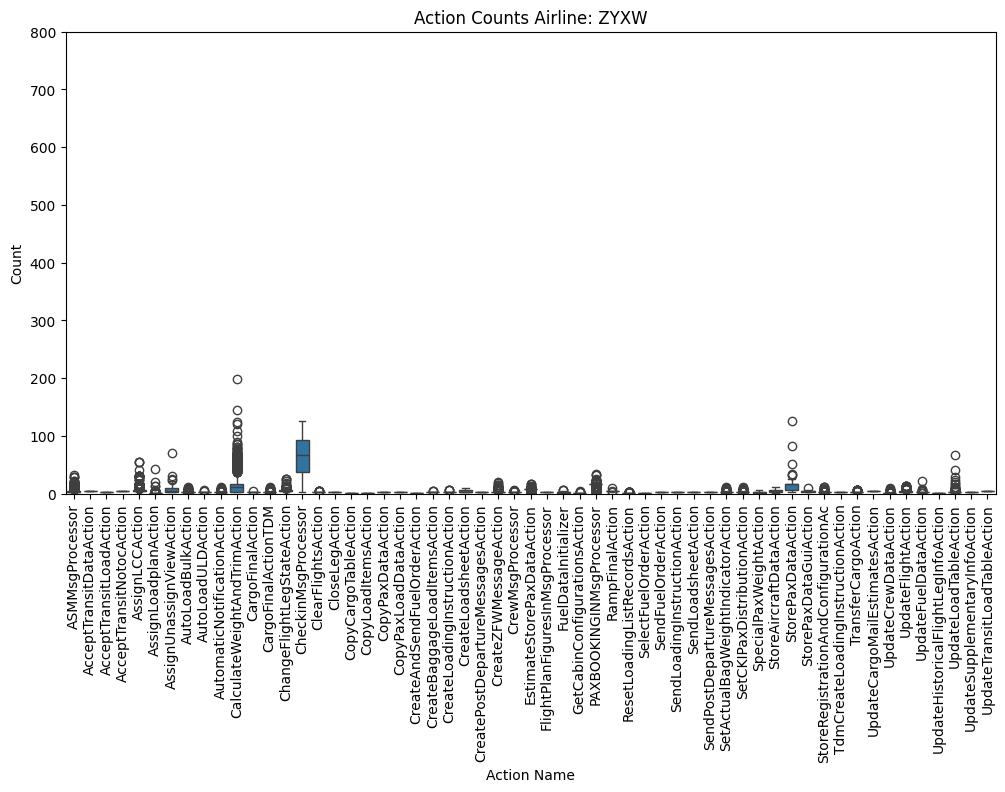

In [74]:
show_action(df_zyxw, "ZYXW")